In [1]:
import torch
from NLPUtils import *

import nltk
nltk.download('brown', download_dir='/home/lestien/anaconda3/envs/TorchEnv/nltk_data')
from nltk.corpus import brown

import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

[nltk_data] Downloading package brown to
[nltk_data]     /home/lestien/anaconda3/envs/TorchEnv/nltk_data...
[nltk_data]   Package brown is already up-to-date!


In [2]:
corpus_unpreproceced = brown.sents(categories=brown.categories())
corpus = list(corpus_unpreproceced)

In [3]:
# Modelo de lenguaje:
method = 'SkipGram'
window_size = 2
embedding_dim = 100

# Parámetros de iteración:
batch_size = 64
epochs = 20
learning_rate = [5e-1, 5e-2, 5e-3, 5e-4]
sample_loss_every = 1000
use_gpu = True

history = []
for lr in learning_rate:
    embedding_layer, vocab, loss_history = SGDTrainWordVectors(corpus,lm=method,window_size=window_size,batch_size=batch_size,embedding_dim=embedding_dim,use_gpu=use_gpu,epochs=epochs,learning_rate=lr,sample_loss_every=sample_loss_every)
    history.append(loss_history)

fig, ax = plt.subplots()
for i, lr in enumerate(learning_rate):
    ax.plot(history[i]['iter'],history[i]['loss'],label='Learning Rate = {:.2g}'.format(lr))

ax.legend()

Starting training...
Epoch: 1, Batch number: 0, Loss: 11.11196517944336
Epoch: 1, Batch number: 1000, Loss: 8.279690742492676
Epoch: 1, Batch number: 2000, Loss: 8.125636100769043
Epoch: 1, Batch number: 3000, Loss: 7.828774452209473
Epoch: 1, Batch number: 4000, Loss: 7.897716045379639
Epoch: 1, Batch number: 5000, Loss: 7.633014678955078
Epoch: 1, Batch number: 6000, Loss: 7.47748327255249
Epoch: 1, Batch number: 7000, Loss: 7.625172138214111
Epoch: 1, Batch number: 8000, Loss: 7.44576358795166
Epoch: 1, Batch number: 9000, Loss: 7.5026702880859375
Exiting training...


KeyboardInterrupt: 

<IPython.core.display.Javascript object>


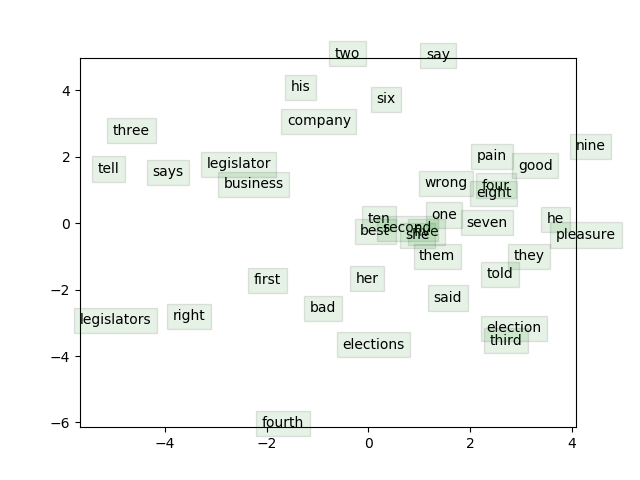

(-6.143856139222178, 4.98712765020508)

In [4]:
# Se visualizan las n palabras más frecuentes:
# n = 100
# freqs = np.array([vocab.get_freq(idx) for idx in range(len(vocab))])
# freqs_indeces = (len(vocab) - np.argsort(freqs) - 1).tolist()[:n]
# visualizeWords = [vocab.index_to_token(idx) for idx in freqs_indeces]

visualizeWords = ['one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'ten',
                  'first', 'second', 'third', 'fourth',
                  'right', 'wrong', 'best', 'good', 'bad', 'pleasure', 'pain',
                  'say', 'says', 'said', 'tell', 'told', 
                  'his', 'her', 'he', 'she', 'them', 'they',
                  'company', 'business', 'elections', 'election', 'legislators', 'legislator']


visualizeIdx = [vocab.token_to_index(word) for word in visualizeWords]
visualizeVecs = np.zeros((len(visualizeIdx), embedding_dim),dtype=np.float)
for i, word in enumerate(visualizeWords):
    idx = vocab.token_to_index(word)
    visualizeVecs[i,:] = next(embedding_layer.parameters())[idx,:].cpu().detach().numpy()
temp = (visualizeVecs - np.mean(visualizeVecs, axis=0))
covariance = 1.0 / len(visualizeIdx) * temp.T.dot(temp)
U,S,V = np.linalg.svd(covariance)
coord = temp.dot(U[:,0:2])

fig, ax = plt.subplots()
for i in range(len(visualizeWords)):
    ax.text(coord[i,0], coord[i,1], visualizeWords[i],
        bbox=dict(facecolor='green', alpha=0.1))

ax.set_xlim((np.min(coord[:,0]), np.max(coord[:,0])))
ax.set_ylim((np.min(coord[:,1]), np.max(coord[:,1])))